# SGD随机梯度下降  

每一个参数按照梯度的方向减小以追求最小化损失函数  
    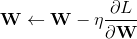

In [1]:
#python实现

class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.lr*grads[key]

# Momentum  

在梯度下降过程中加入了动量，即前面的梯度会影响本轮的梯度方向  

更新方式：  
    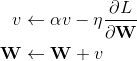

In [2]:
#Python实现

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key,val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

# Nestrov  
Nestrov也是一种动量更新的方式，但为了加速收敛，提前按照之前的动量走了  
一步，然后求导按照梯度在走一步  
更新方式：  
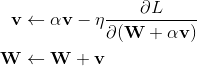

# AdaGrad  
动量法旨在通过每个参数，在之前的迭代中的梯度，来改变当前位置参数的梯度  
在梯度稳定的地方能够加速更新的速度，在梯度不稳定的地方能够文档梯度  

而AdaGrad则是一种不同的思路，他是一种自适应优化算法，它通过每个参数的历史梯度，动太  
更新每一个参数的学习率，使得每个参数的更新率都能够逐渐减少，前期梯度大的，学习率减少的  
快，梯度小的，学习率减少的慢些  
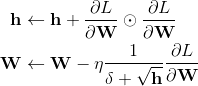

In [3]:
#Python实现

class AdaGrad:
    def __init__(self,lr=0.01):
        self.lr = lr
        self.h = h
    
    def update(self, params,grads):
        if self.h is None:
            self.h = {}
            for key,val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key]*grads[key]
            params[key] -= self.lr*grads[key]/(np.sqrt(self.h[key]) + 1e-7)

# RMSprop  
AdaGrad有个问题，那就是学习率会不断的衰减，这样就使得很多任务在达到最优解之前  
学习率就已经过量减小，所以RMSprop采用指数衰减平均来慢慢丢掉先前的梯度历史  
更新过程为：  
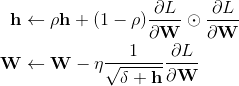

In [5]:
#python实现

class RMSprop:
    def __init__(self, lr=0.01, decay_rate=0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
    
    def update(self,params,grads):
        if self.h is None:
            self.h = {}
            for key,val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1-self.decay_rate)*grads[key]*grads[key]
            params[key] -= self.lr*grads[key]/(np.sqrt(self.h[key]) + 1e-7)

# Adam  
Adam方法结合动量和自适应，同时对学习率和梯度进行动态调整，如果说，动量相当于  
给优化过程增加了惯性，自适应相当于给优化过程增加了阻力，速度越快，阻力也会越大  

Adam首先计算了梯度的一阶矩估计和二阶矩估计，分别代表原来的动量和自适应部分  
![title](https://pic2.zhimg.com/80/v2-06b3014d11c491c2aa1354a0ae19a41d_720w.jpg)

β_1 与 β_2 是两个特有的超参数，一般设为0.9和0.999  

对计算出的矩估计进行修正  
![title](https://pic2.zhimg.com/80/v2-3cf005d6791897e1e5ad0f22a26b1725_720w.png)

简单来说就是由于m和v的初始值为0，所以第一轮的时候会非常偏向于第二项，那么在后面计算更新值的时候  
根据β_1 与 β_2的初始值来看就非常大，需要将其修正回来，根据β_1 与 β_2，所以如果不修正，对于
最初的几次迭代会有很严重的影响；  
最后就是更新参数值：  
![title](https://pic4.zhimg.com/80/v2-f53a4adfd92b5ebbb949be8be68dc7d7_720w.png)

In [6]:
#Python实现

class Adam:
    def __init__(self, lr=0.001, beta1=0.9,beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2  = beta2
        self.iter = 0
        self.m = None
        self.v = None
    
    def update(self,params,grads):
        if self.m is None:
            self.m,self.v = {},{}
            for key, val in parasm.items():
                self.m[key] = np.zero_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0-self.beta2**self.iter)/(1.0 - self.beta1**self.iter)
        for key in params.keys():
            self.m[key] += (1-self.beta1)*(grads[key]-self.m[key])
            self.v[key] += (1-self.beta2)*(grads[key]**2) - self.v[key]
            
            params[key] -=lr_t * self.m[key] / (np.sqrt(self.v[key])+1e-7)